# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [285]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [17]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [20]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | port elizabeth
Processing Record 4 of Set 1 | dunedin
Processing Record 5 of Set 1 | murzuq
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | edinburgh of the seven seas
Processing Record 8 of Set 1 | ghat
Processing Record 9 of Set 1 | ca mau
Processing Record 10 of Set 1 | mugia
Processing Record 11 of Set 1 | blackmans bay
Processing Record 12 of Set 1 | west island
Processing Record 13 of Set 1 | iqaluit
Processing Record 14 of Set 1 | puerto natales
Processing Record 15 of Set 1 | mount gambier
Processing Record 16 of Set 1 | kalmunai
Processing Record 17 of Set 1 | new norfolk
Processing Record 18 of Set 1 | shendi
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1 | thompson
Processing Record 21 of Set 1 | quimili
Processing Record 22 of Set 1 | maracaju
P

In [286]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [287]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bredasdorp,-34.5322,20.0403,7.21,82,99,1.44,ZA,1690915391
1,waitangi,-43.9535,-176.5597,12.68,91,5,3.58,NZ,1690915391
2,port elizabeth,-33.9180,25.5701,10.16,93,0,2.06,ZA,1690915123
3,dunedin,-45.8742,170.5036,6.00,66,99,7.15,NZ,1690915392
4,murzuq,25.9155,13.9184,33.27,13,0,5.37,LY,1690915392


In [288]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [289]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bredasdorp,-34.5322,20.0403,7.21,82,99,1.44,ZA,1690915391
1,waitangi,-43.9535,-176.5597,12.68,91,5,3.58,NZ,1690915391
2,port elizabeth,-33.9180,25.5701,10.16,93,0,2.06,ZA,1690915123
3,dunedin,-45.8742,170.5036,6.00,66,99,7.15,NZ,1690915392
4,murzuq,25.9155,13.9184,33.27,13,0,5.37,LY,1690915392


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

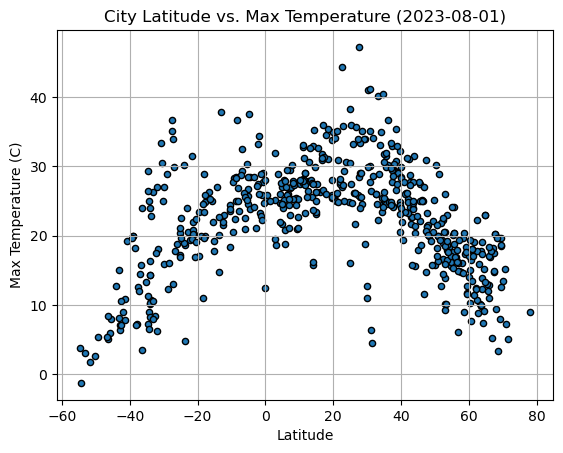

In [290]:
# Build scatter plot for latitude vs. temperature
# Incorporate the other graph properties
city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", grid=True,
                    title="City Latitude vs. Max Temperature (2023-08-01)", 
                    xlabel="Latitude", 
                    ylabel="Max Temperature (C)",
                    edgecolors="black")

# Save the figure
# plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

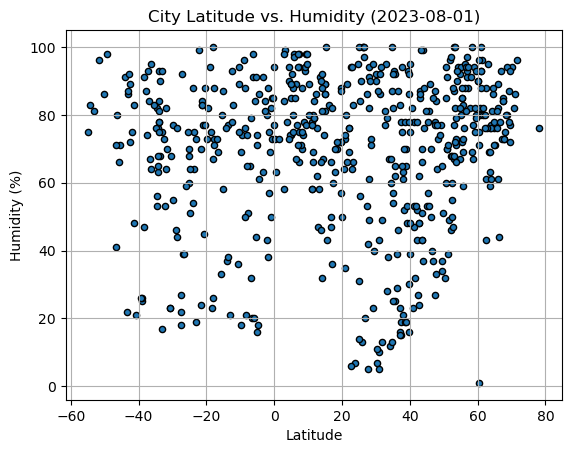

In [291]:
# Build the scatter plots for latitude vs. humidity
# Incorporate the other graph properties
city_data_df.plot(kind="scatter", x="Lat", y="Humidity", grid=True,
                    title="City Latitude vs. Humidity (2023-08-01)", 
                    xlabel="Latitude", 
                    ylabel="Humidity (%)",
                    edgecolors="black")

# Save the figure
# plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

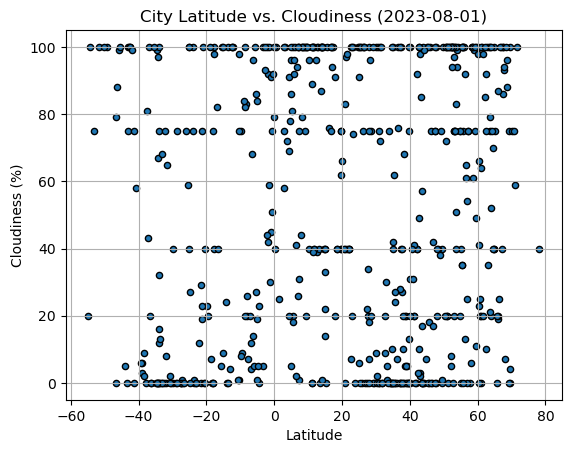

In [292]:
# Build the scatter plots for latitude vs. cloudiness
# Incorporate the other graph properties
# YOUR CODE HERE
city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True,
                    title="City Latitude vs. Cloudiness (2023-08-01)", 
                    xlabel="Latitude", 
                    ylabel="Cloudiness (%)",
                    edgecolors="black")

# Save the figure
# plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

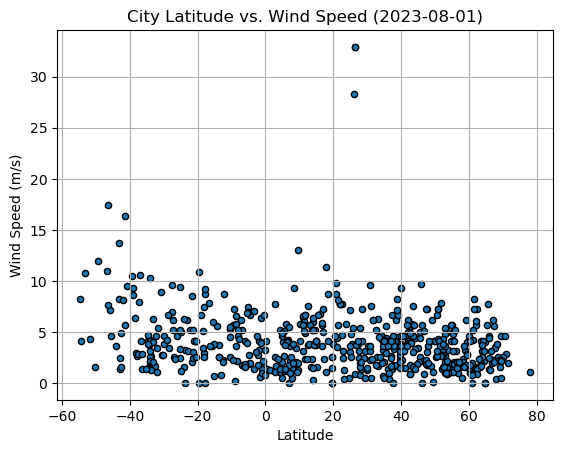

In [293]:
# Build the scatter plots for latitude vs. wind speed
# Incorporate the other graph properties
# YOUR CODE HERE
city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True,
                    title="City Latitude vs. Wind Speed (2023-08-01)", 
                    xlabel="Latitude", 
                    ylabel="Wind Speed (m/s)",
                    edgecolors="black")

# Save the figure
# plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [294]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE 
def regression(x_values, y_values):
    regress_values = x_values*linregress(x_values, y_values)[0] + linregress(x_values, y_values)[1]

    line_eq = "y = " + str(round(linregress(x_values, y_values)[0],2)) + "x +" + str(round(linregress(x_values, y_values)[1],2))
    plt.annotate(line_eq,(max(x_values)-30,max(y_values)-5.5),fontsize=12,color="red")

    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")

    plt.xlabel("Latitude")
    plt.ylabel(y_values.name)

    print(f"The r-value is: {linregress(x_values, y_values)[2]}")

    plt.show()


In [295]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df["Lat"]>=0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,murzuq,25.9155,13.9184,33.27,13,0,5.37,LY,1690915392
7,ghat,24.9647,10.1728,38.28,14,6,7.10,LY,1690915393
8,ca mau,9.1769,105.1500,25.38,93,75,2.08,VN,1690915393
9,mugia,43.1041,-9.2179,22.73,87,3,5.62,ES,1690915393
12,iqaluit,63.7506,-68.5145,9.85,76,75,4.12,CA,1690915394


In [296]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df["Lat"]<0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bredasdorp,-34.5322,20.0403,7.21,82,99,1.44,ZA,1690915391
1,waitangi,-43.9535,-176.5597,12.68,91,5,3.58,NZ,1690915391
2,port elizabeth,-33.9180,25.5701,10.16,93,0,2.06,ZA,1690915123
3,dunedin,-45.8742,170.5036,6.00,66,99,7.15,NZ,1690915392
5,punta arenas,-53.1500,-70.9167,3.06,81,75,10.80,CL,1690915137


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6090096398077387


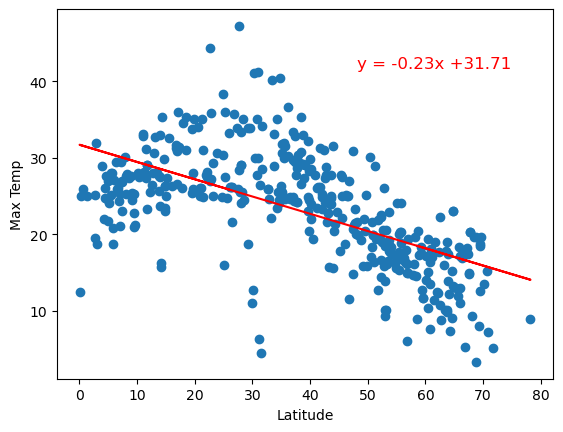

In [297]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

The r-value is: 0.7109411079799294


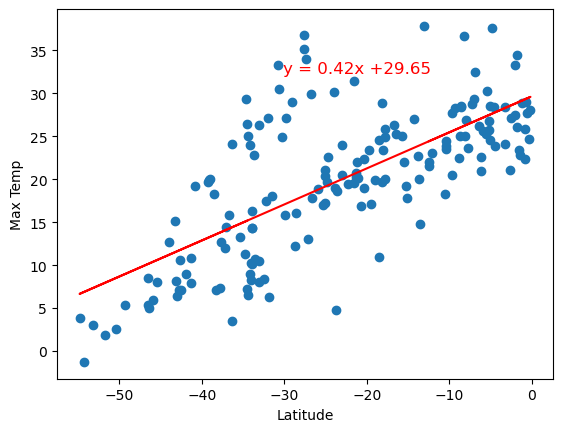

In [298]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.025954993333986206


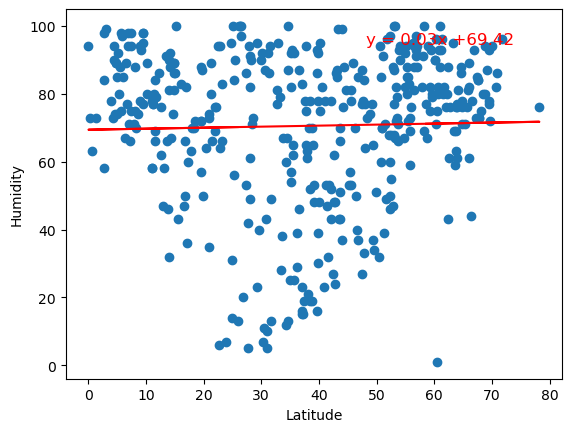

In [299]:
# Northern Hemisphere
# YOUR CODE HERE
regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

The r-value is: -0.06912266333029879


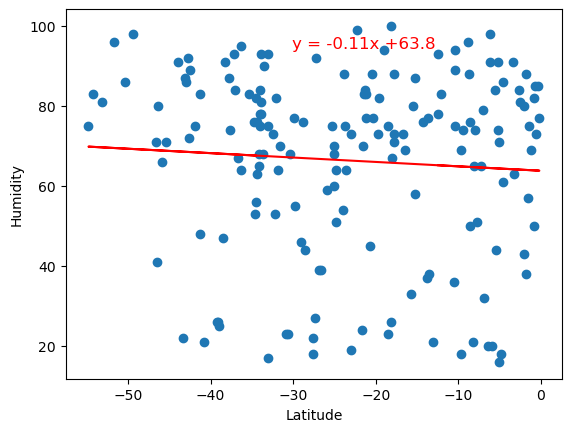

In [300]:
# Southern Hemisphere
# YOUR CODE HERE
regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.046552738470511085


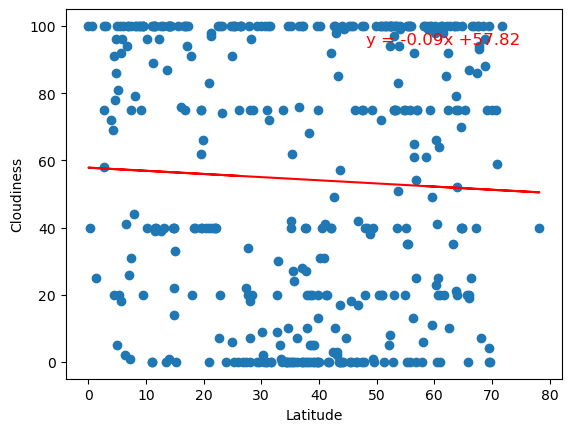

In [301]:
# Northern Hemisphere
# YOUR CODE HERE
regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

The r-value is: 0.03748685725886415


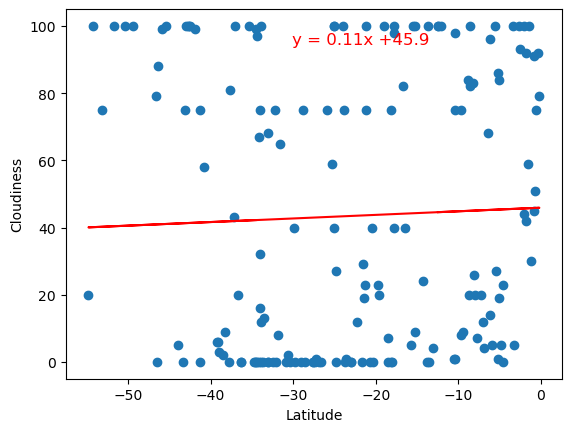

In [302]:
# Southern Hemisphere
# YOUR CODE HERE
regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.13295293211272052


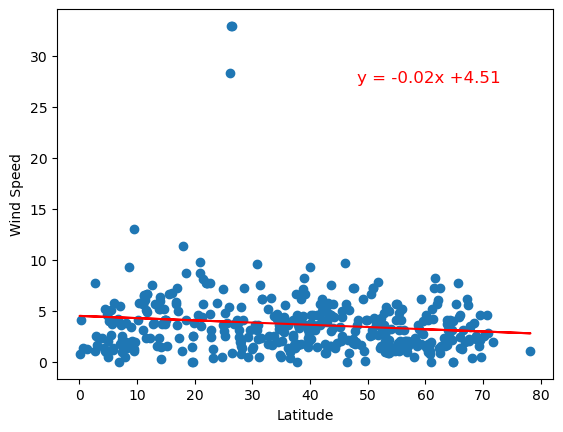

In [303]:
# Northern Hemisphere
# YOUR CODE HERE
regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

The r-value is: -0.2998055941507527


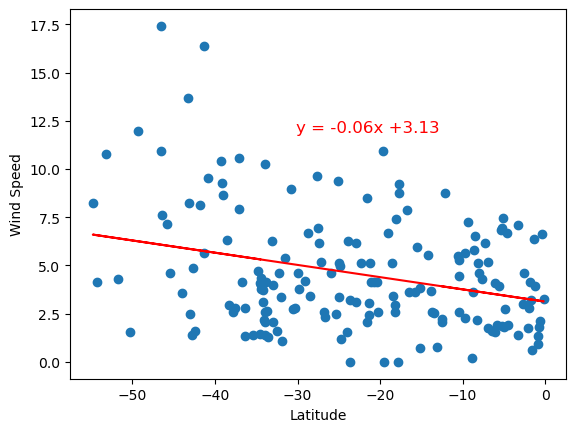

In [304]:
# Southern Hemisphere
# YOUR CODE HERE
regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

**Discussion about the linear relationship:** YOUR RESPONSE HERE